In [1]:
# Run these 2 following lines when running on Google Colab environment
!git clone https://github.com/tripercy/pka-deeplearning-midterm.git
%cd pka-deeplearning-midterm

Cloning into 'pka-deeplearning-midterm'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 146 (delta 73), reused 113 (delta 40), pack-reused 0 (from 0)
Receiving objects: 100% (146/146), 85.21 KiB | 3.55 MiB/s, done.
Resolving deltas: 100% (73/73), done.
/content/pka-deeplearning-midterm


In [2]:
!cd data && bash download.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 41.7M  100 41.7M    0     0  33.3M      0  0:00:01  0:00:01 --:--:--  116M
Archive:  genre-classification-dataset-imdb.zip
  inflating: Genre Classification Dataset/description.txt  
  inflating: Genre Classification Dataset/test_data.txt  
  inflating: Genre Classification Dataset/test_data_solution.txt  
  inflating: Genre Classification Dataset/train_data.txt  
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 5726k  100 5726k    0     0  7744k      0 --:--:-- --:--:-- --:--:-- 24.3M
Archive:  bbc-full-text-document-classification.zip
  inflating: bbc-fulltex

In [3]:
from utils.data_loader import *
base_path = "data/bbc"
x, y, labels = read_bbc(base_path)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
from utils.preprocess import *
from utils.vectorizer import *
from utils.transformer_utils import *
import gensim.downloader as api

In [5]:
embedding_model = api.load("glove-wiki-gigaword-50")

[==================================================] 100.0% 66.0/66.0MB downloaded


In [6]:
preprocessed = preprocess_ds(x)
vectorized = vectorize_ds(preprocessed, embedding_model, 100)

In [7]:
pos_embedded = add_positional_encoding(vectorized)

In [8]:
x_train, y_train, x_test, y_test = train_test_split(pos_embedded, y, 0.8)

In [9]:
# truncate train data for testing
# x_train = x_train[:500]
# y_train = y_train[:500]

In [10]:
from model import base_model
from model.layers.activation import *
from model.layers.loss_function import *
from model.layers import dense_layer, pooling_layer, input_layer, transformer_encoder_layer
from model.optimizers import gradient_descent, adam_optimizer

In [11]:
inp = input_layer.InputLayer(50)

encoder = transformer_encoder_layer.TransformerEncoderLayer(inp, 10, 5)

avg = pooling_layer.AverageLayer(encoder)
out = dense_layer.DenseLayer(avg, 5, softmax_forward, softmax_backward)

nn_model = base_model.BaseModel(
    inp, out,
    32,
    adam_optimizer.AdamOpt(alpha=0.001),
    cross_entropy_loss, cross_entropy_grad)

In [13]:
nn_model.reset()
nn_model.fit(x_train, y_train, epochs=100)

Epoch 1/100


100%|██████████| 56/56.0 [01:04<00:00,  1.15s/it]


Loss: 2.1323614751017677
Epoch 2/100


100%|██████████| 56/56.0 [01:03<00:00,  1.14s/it]


Loss: 1.947121189049755
Epoch 3/100


100%|██████████| 56/56.0 [01:03<00:00,  1.14s/it]


Loss: 1.8318015394420466
Epoch 4/100


100%|██████████| 56/56.0 [01:03<00:00,  1.14s/it]


Loss: 1.7423508946596182
Epoch 5/100


100%|██████████| 56/56.0 [01:03<00:00,  1.13s/it]


Loss: 1.691693836202014
Epoch 6/100


100%|██████████| 56/56.0 [01:05<00:00,  1.16s/it]


Loss: 1.6507443793026932
Epoch 7/100


100%|██████████| 56/56.0 [01:03<00:00,  1.13s/it]


Loss: 1.6169121320273785
Epoch 8/100


100%|██████████| 56/56.0 [01:03<00:00,  1.13s/it]


Loss: 1.5880243886196628
Epoch 9/100


100%|██████████| 56/56.0 [01:02<00:00,  1.12s/it]


Loss: 1.5575959820053171
Epoch 10/100


100%|██████████| 56/56.0 [01:03<00:00,  1.14s/it]


Loss: 1.5240626390093353
Epoch 11/100


100%|██████████| 56/56.0 [01:03<00:00,  1.13s/it]


Loss: 1.5067776562351158
Epoch 12/100


100%|██████████| 56/56.0 [01:03<00:00,  1.13s/it]


Loss: 1.5062727649170247
Epoch 13/100


100%|██████████| 56/56.0 [01:03<00:00,  1.13s/it]


Loss: 1.4884852397403063
Epoch 14/100


100%|██████████| 56/56.0 [01:03<00:00,  1.13s/it]


Loss: 1.481105103056942
Epoch 15/100


100%|██████████| 56/56.0 [01:03<00:00,  1.13s/it]


Loss: 1.4649703960527511
Epoch 16/100


100%|██████████| 56/56.0 [01:05<00:00,  1.17s/it]


Loss: 1.448523071570401
Epoch 17/100


100%|██████████| 56/56.0 [01:02<00:00,  1.12s/it]


Loss: 1.4510399320857643
Epoch 18/100


100%|██████████| 56/56.0 [01:03<00:00,  1.13s/it]


Loss: 1.4361138600977057
Epoch 19/100


100%|██████████| 56/56.0 [01:03<00:00,  1.13s/it]


Loss: 1.42320373615818
Epoch 20/100


100%|██████████| 56/56.0 [01:04<00:00,  1.15s/it]


Loss: 1.4360376107510298
Epoch 21/100


100%|██████████| 56/56.0 [01:03<00:00,  1.13s/it]


Loss: 1.4212043794443645
Epoch 22/100


100%|██████████| 56/56.0 [01:02<00:00,  1.12s/it]


Loss: 1.4342296400846954
Epoch 23/100


100%|██████████| 56/56.0 [01:02<00:00,  1.12s/it]


Loss: 1.4261363712898425
Epoch 24/100


100%|██████████| 56/56.0 [01:04<00:00,  1.14s/it]


Loss: 1.411503722680049
Epoch 25/100


100%|██████████| 56/56.0 [01:03<00:00,  1.13s/it]


Loss: 1.4106329887454299
Epoch 26/100


100%|██████████| 56/56.0 [01:03<00:00,  1.13s/it]


Loss: 1.4072044496863771
Epoch 27/100


100%|██████████| 56/56.0 [01:02<00:00,  1.12s/it]


Loss: 1.393868256982595
Epoch 28/100


100%|██████████| 56/56.0 [01:04<00:00,  1.14s/it]


Loss: 1.3974833193888792
Epoch 29/100


100%|██████████| 56/56.0 [01:02<00:00,  1.12s/it]


Loss: 1.3883087684154671
Epoch 30/100


100%|██████████| 56/56.0 [01:02<00:00,  1.12s/it]


Loss: 1.3808204164345084
Epoch 31/100


100%|██████████| 56/56.0 [01:03<00:00,  1.13s/it]


Loss: 1.3846591356743014
Epoch 32/100


100%|██████████| 56/56.0 [01:03<00:00,  1.14s/it]


Loss: 1.3962994703967746
Epoch 33/100


100%|██████████| 56/56.0 [01:03<00:00,  1.14s/it]


Loss: 1.382700586383052
Epoch 34/100


100%|██████████| 56/56.0 [01:02<00:00,  1.12s/it]


Loss: 1.3863891512569855
Epoch 35/100


100%|██████████| 56/56.0 [01:02<00:00,  1.12s/it]


Loss: 1.3843066731250164
Epoch 36/100


100%|██████████| 56/56.0 [01:03<00:00,  1.14s/it]


Loss: 1.4076012754941942
Epoch 37/100


100%|██████████| 56/56.0 [01:02<00:00,  1.12s/it]


Loss: 1.3839769808453268
Epoch 38/100


100%|██████████| 56/56.0 [01:05<00:00,  1.17s/it]


Loss: 1.4024629266623978
Epoch 39/100


100%|██████████| 56/56.0 [01:03<00:00,  1.13s/it]


Loss: 1.3936746801038677
Epoch 40/100


100%|██████████| 56/56.0 [01:02<00:00,  1.12s/it]


Loss: 1.4026753609841243
Epoch 41/100


100%|██████████| 56/56.0 [01:02<00:00,  1.12s/it]


Loss: 1.403835211742918
Epoch 42/100


100%|██████████| 56/56.0 [01:04<00:00,  1.15s/it]


Loss: 1.3878571493205165
Epoch 43/100


100%|██████████| 56/56.0 [01:03<00:00,  1.13s/it]


Loss: 1.4065856873608464
Epoch 44/100


100%|██████████| 56/56.0 [01:02<00:00,  1.12s/it]


Loss: 1.404051620348204
Epoch 45/100


100%|██████████| 56/56.0 [01:03<00:00,  1.13s/it]


Loss: 1.4010571521079782
Epoch 46/100


100%|██████████| 56/56.0 [01:02<00:00,  1.12s/it]


Loss: 1.3884727653765379
Epoch 47/100


100%|██████████| 56/56.0 [01:04<00:00,  1.14s/it]


Loss: 1.3697386201723234
Epoch 48/100


100%|██████████| 56/56.0 [01:02<00:00,  1.12s/it]


Loss: 1.3754172007161662
Epoch 49/100


100%|██████████| 56/56.0 [01:03<00:00,  1.13s/it]


Loss: 1.3717567537758915
Epoch 50/100


100%|██████████| 56/56.0 [01:02<00:00,  1.12s/it]


Loss: 1.3663548453798149
Epoch 51/100


100%|██████████| 56/56.0 [01:03<00:00,  1.13s/it]


Loss: 1.3652054744537179
Epoch 52/100


100%|██████████| 56/56.0 [01:04<00:00,  1.15s/it]


Loss: 1.358022160339203
Epoch 53/100


100%|██████████| 56/56.0 [01:02<00:00,  1.12s/it]


Loss: 1.3706858979673568
Epoch 54/100


100%|██████████| 56/56.0 [01:03<00:00,  1.13s/it]


Loss: 1.3517036745517663
Epoch 55/100


100%|██████████| 56/56.0 [01:02<00:00,  1.12s/it]


Loss: 1.3583151772665674
Epoch 56/100


100%|██████████| 56/56.0 [01:02<00:00,  1.12s/it]


Loss: 1.3523526542439512
Epoch 57/100


100%|██████████| 56/56.0 [01:02<00:00,  1.12s/it]


Loss: 1.349319751241557
Epoch 58/100


100%|██████████| 56/56.0 [01:03<00:00,  1.14s/it]


Loss: 1.35381559270629
Epoch 59/100


100%|██████████| 56/56.0 [01:02<00:00,  1.12s/it]


Loss: 1.3483657624263115
Epoch 60/100


100%|██████████| 56/56.0 [01:02<00:00,  1.12s/it]


Loss: 1.355287706259587
Epoch 61/100


100%|██████████| 56/56.0 [01:02<00:00,  1.12s/it]


Loss: 1.3379525339597067
Epoch 62/100


100%|██████████| 56/56.0 [01:03<00:00,  1.14s/it]


Loss: 1.3331874901318905
Epoch 63/100


100%|██████████| 56/56.0 [01:02<00:00,  1.12s/it]


Loss: 1.351197500221192
Epoch 64/100


100%|██████████| 56/56.0 [01:02<00:00,  1.12s/it]


Loss: 1.348193097754058
Epoch 65/100


100%|██████████| 56/56.0 [01:03<00:00,  1.13s/it]


Loss: 1.3479048533131401
Epoch 66/100


100%|██████████| 56/56.0 [01:03<00:00,  1.14s/it]


Loss: 1.3420411505566856
Epoch 67/100


100%|██████████| 56/56.0 [01:02<00:00,  1.12s/it]


Loss: 1.346901353211109
Epoch 68/100


100%|██████████| 56/56.0 [01:02<00:00,  1.12s/it]


Loss: 1.3482945294441524
Epoch 69/100


100%|██████████| 56/56.0 [01:02<00:00,  1.12s/it]


Loss: 1.3315977264180625
Epoch 70/100


100%|██████████| 56/56.0 [01:03<00:00,  1.14s/it]


Loss: 1.3283004908830625
Epoch 71/100


100%|██████████| 56/56.0 [01:02<00:00,  1.12s/it]


Loss: 1.3384696115675303
Epoch 72/100


100%|██████████| 56/56.0 [01:02<00:00,  1.12s/it]


Loss: 1.3274343868764606
Epoch 73/100


100%|██████████| 56/56.0 [01:03<00:00,  1.14s/it]


Loss: 1.3232274137737934
Epoch 74/100


100%|██████████| 56/56.0 [01:03<00:00,  1.13s/it]


Loss: 1.3144376458295235
Epoch 75/100


100%|██████████| 56/56.0 [01:02<00:00,  1.12s/it]


Loss: 1.3131180683261139
Epoch 76/100


100%|██████████| 56/56.0 [01:02<00:00,  1.12s/it]


Loss: 1.3396634410034418
Epoch 77/100


100%|██████████| 56/56.0 [01:03<00:00,  1.14s/it]


Loss: 1.3469931303340166
Epoch 78/100


100%|██████████| 56/56.0 [01:03<00:00,  1.13s/it]


Loss: 1.34355279769431
Epoch 79/100


100%|██████████| 56/56.0 [01:03<00:00,  1.13s/it]


Loss: 1.3202454114896192
Epoch 80/100


100%|██████████| 56/56.0 [01:03<00:00,  1.13s/it]


Loss: 1.322589397314095
Epoch 81/100


100%|██████████| 56/56.0 [01:03<00:00,  1.14s/it]


Loss: 1.3308066183988763
Epoch 82/100


100%|██████████| 56/56.0 [01:02<00:00,  1.12s/it]


Loss: 1.3424022730176135
Epoch 83/100


100%|██████████| 56/56.0 [01:02<00:00,  1.12s/it]


Loss: 1.316482277668817
Epoch 84/100


100%|██████████| 56/56.0 [01:02<00:00,  1.12s/it]


Loss: 1.3240669230862394
Epoch 85/100


100%|██████████| 56/56.0 [01:04<00:00,  1.15s/it]


Loss: 1.3244304549299546
Epoch 86/100


100%|██████████| 56/56.0 [01:04<00:00,  1.15s/it]


Loss: 1.3204629324301445
Epoch 87/100


100%|██████████| 56/56.0 [01:04<00:00,  1.15s/it]


Loss: 1.3033972082697804
Epoch 88/100


100%|██████████| 56/56.0 [01:04<00:00,  1.15s/it]


Loss: 1.3040787294417175
Epoch 89/100


100%|██████████| 56/56.0 [01:03<00:00,  1.14s/it]


Loss: 1.310571360901145
Epoch 90/100


100%|██████████| 56/56.0 [01:03<00:00,  1.14s/it]


Loss: 1.3224957544569036
Epoch 91/100


100%|██████████| 56/56.0 [01:03<00:00,  1.13s/it]


Loss: 1.3191895527700852
Epoch 92/100


100%|██████████| 56/56.0 [01:04<00:00,  1.16s/it]


Loss: 1.316868928199339
Epoch 93/100


100%|██████████| 56/56.0 [01:03<00:00,  1.13s/it]


Loss: 1.305211931111873
Epoch 94/100


100%|██████████| 56/56.0 [01:03<00:00,  1.14s/it]


Loss: 1.303436738522461
Epoch 95/100


100%|██████████| 56/56.0 [01:03<00:00,  1.13s/it]


Loss: 1.3051861271171457
Epoch 96/100


100%|██████████| 56/56.0 [01:04<00:00,  1.15s/it]


Loss: 1.3199608618350622
Epoch 97/100


100%|██████████| 56/56.0 [01:03<00:00,  1.13s/it]


Loss: 1.3212371224219195
Epoch 98/100


100%|██████████| 56/56.0 [01:03<00:00,  1.13s/it]


Loss: 1.3130125981868528
Epoch 99/100


100%|██████████| 56/56.0 [01:05<00:00,  1.16s/it]


Loss: 1.3127403951084247
Epoch 100/100


100%|██████████| 56/56.0 [01:05<00:00,  1.17s/it]

Loss: 1.3125949164879958


In [14]:
import matplotlib.pyplot as plt

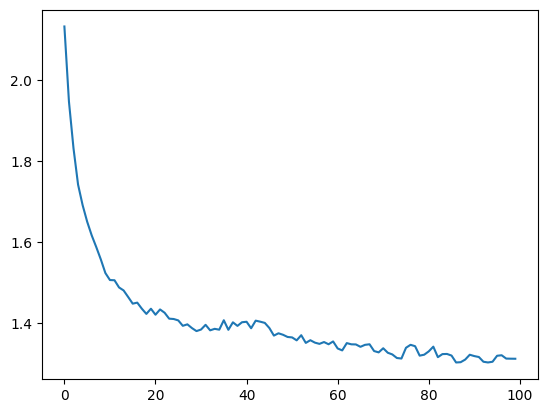

In [15]:
plt.plot(nn_model.history)

In [16]:
nn_model.evaluate(x_test, y_test)

(0.3887640449438202,
 array([0.34976205, 0.24826377, 0.27299065, 0.42021136, 0.23934374]),
 array([0.33301587, 0.24987533, 0.27706633, 0.39629494, 0.26893558]))

In [17]:
sample = """
Johnson too strong for GB runners

Britain's Kathy Butler and Hayley Yelling were no match for Benita Johnson in
the 51st Cross International Zornotza in Amorebieta, Spain.

Butler and Yelling finished fourth and fifth as Australian world champion
Johnson romped to a five-second victory in the 6km race ahead of Edith Masai.
Masai's fellow Kenyan Alice Timbilil finished third. Johnson said: "I ran
comfortably for the first 3km and then I tried to leave the others but it wasn't
an easy task." Butler clocked a time of 22 minutes 45 seconds - 22secs behind
the winner but four ahead of Yelling, who last month succeeded Paula Radcliffe
as European champion. Johnson, will be one of the star attractions at the Great
EdinburghInternational Cross Country on 15 January.
"""

In [18]:
sample_preprocessed = preprocess_sequence(sample)
sample_vectorized = vectorize_sequence(sample_preprocessed, embedding_model, 100)

In [19]:
sample_x = np.expand_dims(np.array(sample_vectorized), axis=0)
sample_x = add_positional_encoding(sample_x)
sample_x.shape

(1, 100, 50)

In [20]:
sample_y_pred = nn_model.predict(sample_x)

In [21]:
labels[np.argmax(sample_y_pred[0])]

'sport'